# Customer Segmentation using RFM and Clustering Method

### 1. Import Required Packages

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from scipy.stats import zscore
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import umap



%matplotlib inline
warnings.filterwarnings("ignore")

### 2. Data Loading

In [49]:
# Import data

data_folder_path = "/home/ariqlubis/Documents/perqara_assessment/notebook/data"
customer = pd.read_csv(os.path.join(data_folder_path, 'customers_dataset.csv'))
geolocation = pd.read_csv(os.path.join(data_folder_path, 'geolocation_dataset.csv'))
orders = pd.read_csv(os.path.join(data_folder_path, 'orders_dataset.csv'))
order_items = pd.read_csv(os.path.join(data_folder_path, 'order_items_dataset.csv'))
order_payments = pd.read_csv(os.path.join(data_folder_path, 'order_payments_dataset.csv'))
order_reviews = pd.read_csv(os.path.join(data_folder_path, 'order_reviews_dataset.csv'))
products = pd.read_csv(os.path.join(data_folder_path, 'products_dataset.csv'))
sellers = pd.read_csv(os.path.join(data_folder_path, 'sellers_dataset.csv'))
product_english_name = pd.read_csv(os.path.join(data_folder_path, 'product_category_name_translation.csv'))

In [50]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [51]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [52]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [53]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [54]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [55]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [56]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [57]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 3. Data Cleaning

#### 3.1. Check data information

In [58]:
# Check data information

datasets = [customer, geolocation, orders, order_items, order_payments, order_reviews, products, sellers]
datasets_name = ['customer', 'geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers']

dataset_info = pd.DataFrame()
dataset_info['dataset'] = datasets_name
dataset_info['n_rows'] = [df.shape[0] for df in datasets]
dataset_info['n_cols'] = [df.shape[1] for df in datasets]
dataset_info['null'] = [df.isnull().sum().sum() for df in datasets]
dataset_info['qty_null_col'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
dataset_info['null_col'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

dataset_info

,dataset,n_rows,n_cols,null,qty_null_col,null_col
0,customer,99441,5,0,0,
1,geolocation,1000163,5,0,0,
2,orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_dat..."
3,order_items,112650,7,0,0,
4,order_payments,103886,5,0,0,
5,order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
6,products,32951,9,2448,8,"product_category_name, product_name_lenght, pr..."
7,sellers,3095,4,0,0,


In [59]:
for index, value in enumerate(dataset_info.null_col):
    print(index, value)

0 
1 
2 order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
3 
4 
5 review_comment_title, review_comment_message
6 product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
7 


#### 3.2. Merge data

In [60]:
df = pd.merge(customer, orders, on='customer_id', how='inner')
df = df.merge(order_reviews, on='order_id', how='inner')
df = df.merge(order_items, on='order_id', how='inner')
df = df.merge(products, on='product_id', how='inner')
df = df.merge(order_payments, on='order_id', how='inner')
df = df.merge(sellers, on='seller_id', how='inner')
df= df.merge(product_english_name, on='product_category_name', how='inner')
df.shape

(115609, 40)

#### 3.3. Handling Missing and Duplicated 

In [61]:
df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)
df.drop_duplicates(inplace=True)

In [62]:
df.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             99701
review_comment_message           65835
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght      

In [63]:
idx = df[['product_length_cm', 'product_weight_g', 'product_height_cm', 'product_width_cm']][df['product_width_cm'].isna()].index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

#### 3.4. Feature Engineering

In [64]:
df['product_volume'] = df['product_height_cm'] * df['product_length_cm'] * df['product_width_cm']
df.drop(columns=['product_height_cm', 'product_length_cm', 'product_width_cm'], inplace=True, axis=1)

In [65]:
df.product_category_name_english.unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'baby', 'bed_bath_table', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu_ray'

In [66]:
# Fix category product

categories = {
    "Home & Living": [
        "furniture_decor", "furniture_living_room", "furniture_bedroom",
        "furniture_mattress_and_upholstery", "home_confort", "home_comfort_2",
        "bed_bath_table", "kitchen_dining_laundry_garden_furniture", "housewares",
        "home_appliances", "home_appliances_2", "small_appliances",
        "small_appliances_home_oven_and_coffee", "air_conditioning", "garden_tools",
        "costruction_tools_garden", "office_furniture"
    ],
    "Electronics & Technology": [
        "computers_accessories", "musical_instruments", "consoles_games",
        "electronics", "computers", "tablets_printing_image", "telephony",
        "fixed_telephony", "signaling_and_security", "audio", "cine_photo",
        "cds_dvds_musicals"
    ],
    "Fashion & Accessories": [
        "fashion_female_clothing", "fashion_male_clothing", "fashion_bags_accessories",
        "fashion_shoes", "fashion_underwear_beach", "fashion_childrens_clothes",
        "fashion_sport", 'fashio_female_clothing'
    ],
    "Books & Media": [
        "books_general_interest", "music", "dvds_blu_ray", "christmas_supplies",
        "party_supplies", "books_technical", "books_imported", "arts_and_craftmanship",
        "art"
    ],
    "Outdoor & Lifestyle": [
        "auto", "sports_leisure", "baby", "toys", "cool_stuff", "garden_tools",
        "pet_shop", "flowers", "la_cuisine"
    ],
    "Construction & Industry": [
        "home_construction", "construction_tools_construction", "construction_tools_lights",
        "agro_industry_and_commerce", "construction_tools_safety", "costruction_tools_tools",
        "industry_commerce_and_business",
        "security_and_services"
    ],
    "Health & Beauty": [
        "health_beauty", "perfumery", "diapers_and_hygiene"
    ],
    "Stationery & Supplies": [
        "stationery", "market_place", "watches_gifts", "luggage_accessories"
    ],
    "Food & Drink": [
        "food_drink", "drinks", "food"
    ]
}


category_mapping = {}
for group, items in categories.items():
    for item in items:
        category_mapping[item] = group


df['product_category'] = df['product_category_name_english'].map(category_mapping)
df['product_category'].isna().sum()

0

In [67]:
# Fix data type to datetime

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'])

In [68]:
# Calculates delivery time

df['actual_delivery_duration_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['estimated_delivery_duration_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
df[['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'actual_delivery_duration_days', 'estimated_delivery_duration_days']].head()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_duration_days,estimated_delivery_duration_days
0,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,8,19
1,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06,16,24
2,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13,26,24
3,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10,14,27
4,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15,11,16


In [69]:
# Categorize delivery time

def class_delivery(data):
    if data['delivery_time_diff'] < 0:
        return 'faster'
    elif data['delivery_time_diff'] == 0:
        return 'on_time'
    else:
        return 'late'
    
df['delivery_time_diff'] = df['actual_delivery_duration_days'] - df['estimated_delivery_duration_days']
df['delivery_status'] = df.apply(class_delivery, axis=1)

In [70]:
df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,shipping_limit_date,price,freight_value,...,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,product_volume,actual_delivery_duration_days,estimated_delivery_duration_days,delivery_time_diff
count,113193.000000,113193,113193,113193,113193,113193.000000,113193.000000,113193,113193.000000,113193.000000,...,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000
mean,35085.687437,2018-01-01 07:46:22.707817472,2018-01-04 14:19:54.360985344,2018-01-13 18:22:26.739418624,2018-01-25 03:50:01.955951360,4.082505,1.195065,2018-01-07 22:21:08.998047488,119.846650,20.002595,...,2.206833,2106.236075,1.090818,2.943680,171.557922,24525.441352,15305.660253,11.976447,23.471928,-11.495481
min,1003.000000,2016-10-03 09:44:50,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,1.000000,1.000000,2016-10-08 10:34:01,0.850000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1001.000000,168.000000,0.000000,2.000000,-146.000000
25%,11310.000000,2017-09-13 14:12:25,2017-09-15 20:07:55,2017-09-25 18:34:40,2017-10-04 00:00:00,4.000000,1.000000,2017-09-20 13:24:55,39.900000,13.080000,...,1.000000,300.000000,1.000000,1.000000,60.850000,6429.000000,2856.000000,6.000000,18.000000,-17.000000
50%,24315.000000,2018-01-20 09:22:45,2018-01-24 00:23:35,2018-02-02 02:15:19,2018-02-16 00:00:00,5.000000,1.000000,2018-01-26 14:14:20,74.900000,16.320000,...,1.000000,700.000000,1.000000,2.000000,107.960000,13660.000000,6612.000000,10.000000,23.000000,-12.000000
75%,58865.000000,2018-05-05 13:57:15,2018-05-08 14:07:00,2018-05-15 20:02:55,2018-05-28 00:00:00,5.000000,1.000000,2018-05-10 19:15:24,132.980000,21.190000,...,3.000000,1800.000000,1.000000,4.000000,189.150000,28495.000000,18468.000000,15.000000,28.000000,-7.000000
max,99980.000000,2018-08-29 15:00:37,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,5.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,...,20.000000,40425.000000,26.000000,24.000000,13664.080000,99730.000000,296208.000000,208.000000,155.000000,189.000000
std,29867.822574,NaN,NaN,NaN,NaN,1.345924,0.687526,NaN,181.079901,15.711728,...,1.718331,3765.207714,0.686674,2.779181,264.197701,27648.963528,23408.715660,9.362094,8.829055,10.101000


Terlihat pada fitur delivery_time_diff, min sebesar -146 hari dan max sebesar 189 hari, dan rata-rata sebesar 11 hari serta std 10 hari. Dugaan outlier!

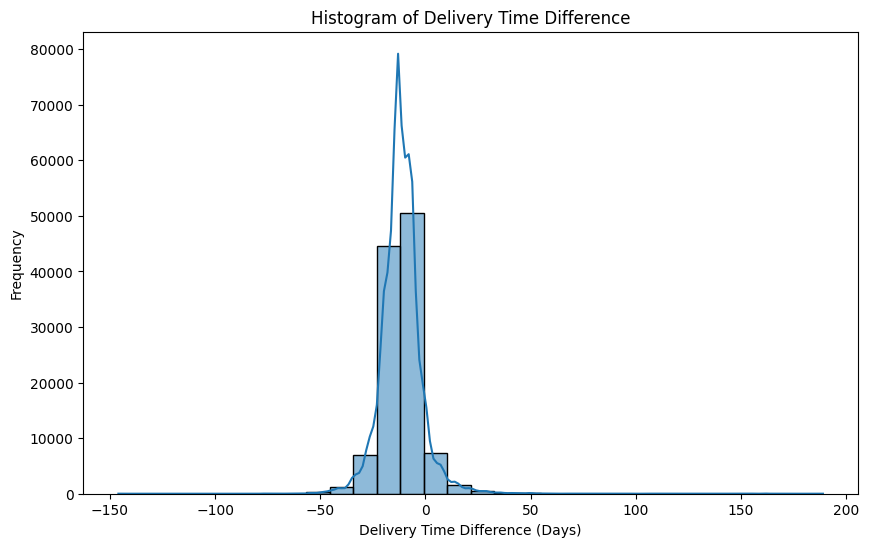

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time_diff'], bins=30, kde=True)
plt.title('Histogram of Delivery Time Difference')
plt.xlabel('Delivery Time Difference (Days)')
plt.ylabel('Frequency')
plt.show()

Terlihat bahwa distribusi delivery_time_diff adalah approximately normally distributed. Maka untuk cek dan menghilangkan outlier, kita menggunakan z_score

In [72]:
df['z_score_delivery_time_diff'] = zscore(df['delivery_time_diff'])
df[['delivery_time_diff', 'z_score_delivery_time_diff']].head()

,delivery_time_diff,z_score_delivery_time_diff
0,-11,0.049053
1,-8,0.346055
2,2,1.336060
3,-13,-0.148948
4,-5,0.643056


In [73]:
thresh = 3

outliers = df[(df['z_score_delivery_time_diff'] > thresh) | (df['z_score_delivery_time_diff']) < -thresh]
outliers.shape

(0, 44)

Tidak ada outlier

### 4. EDA

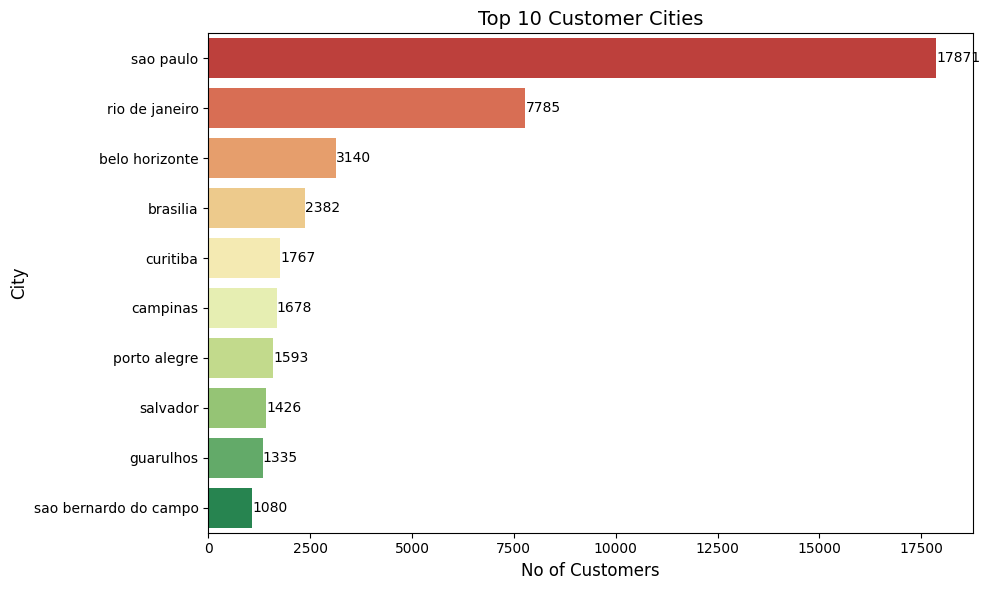

In [74]:
# Top 10 Customer by City
top_cities = df['customer_city'].value_counts().nlargest(10)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, 
            palette='RdYlGn', legend=False)

for index, value in enumerate(top_cities.values):
    plt.text(value, index, str(value), va='center')

plt.title("Top 10 Customer Cities", fontsize=14)
plt.xlabel("No of Customers", fontsize=12)
plt.ylabel("City", fontsize=12)

plt.tight_layout()
plt.show()

In [75]:
df['order_status'].value_counts()

order_status
delivered    113186
canceled          7
Name: count, dtype: int64

In [76]:
# Extreme imbalance data, so we need to drop order_status column
df.drop(columns=['order_status'], inplace=True)

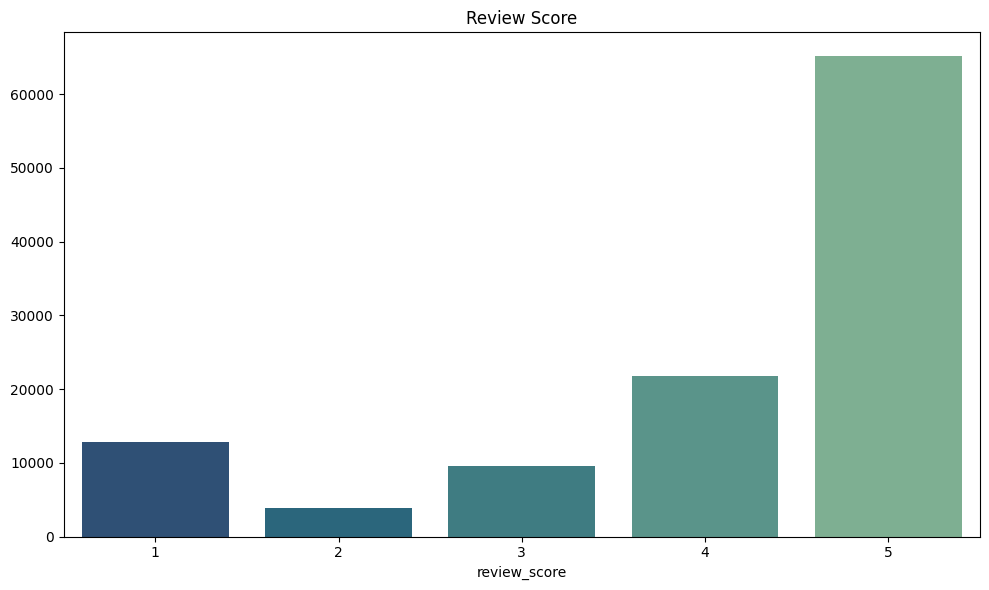

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.review_score.value_counts().index, y=df.review_score.value_counts().values, palette='crest_r')
plt.title('Review Score')

plt.tight_layout()
plt.show()

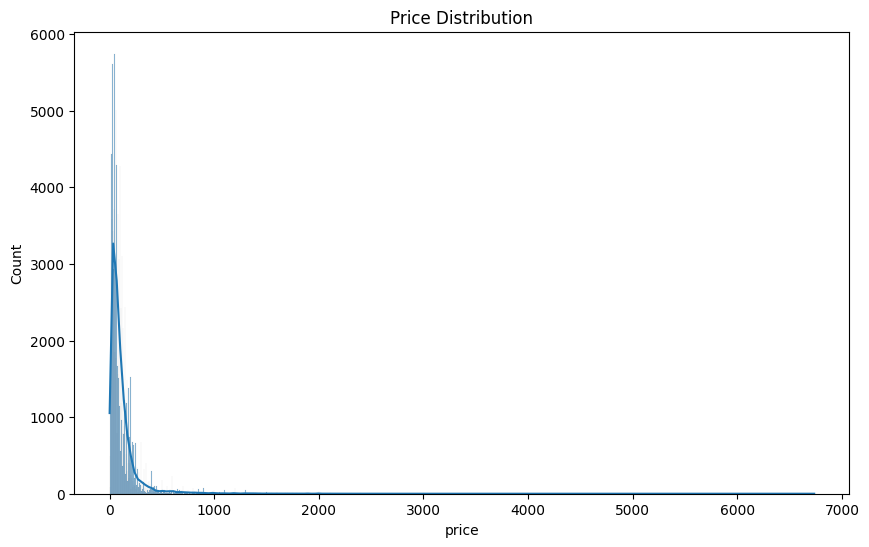

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')

plt.show()

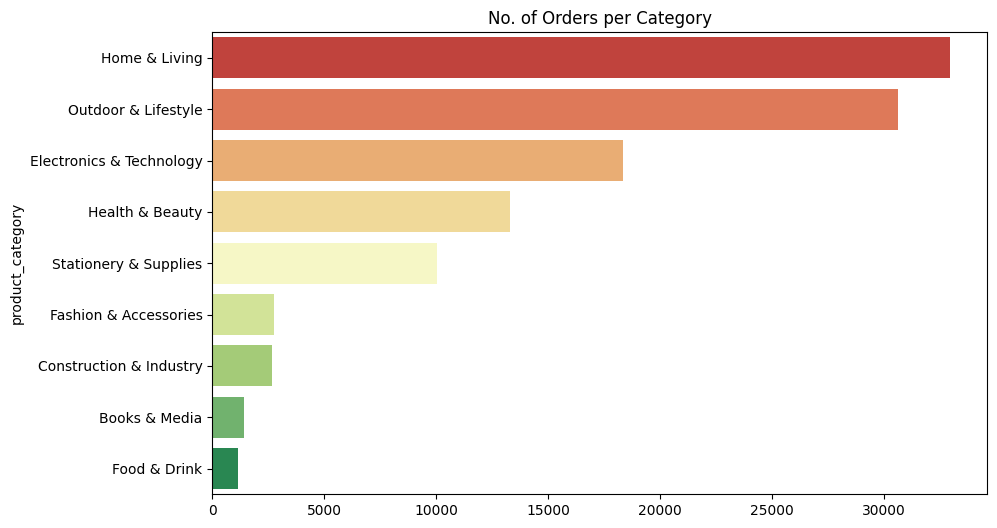

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['product_category'].value_counts().values, y=df['product_category'].value_counts().index, palette='RdYlGn')
plt.title('No. of Orders per Category')

plt.show()

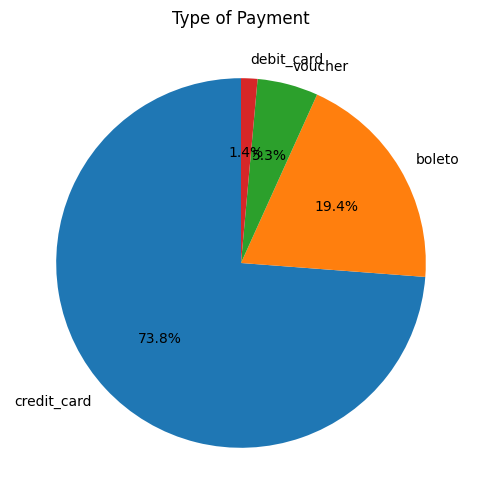

In [80]:
plt.figure(figsize=(10, 6))
plt.pie(df['payment_type'].value_counts().values,
        labels= df['payment_type'].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=90);

plt.title("Type of Payment")

plt.show()

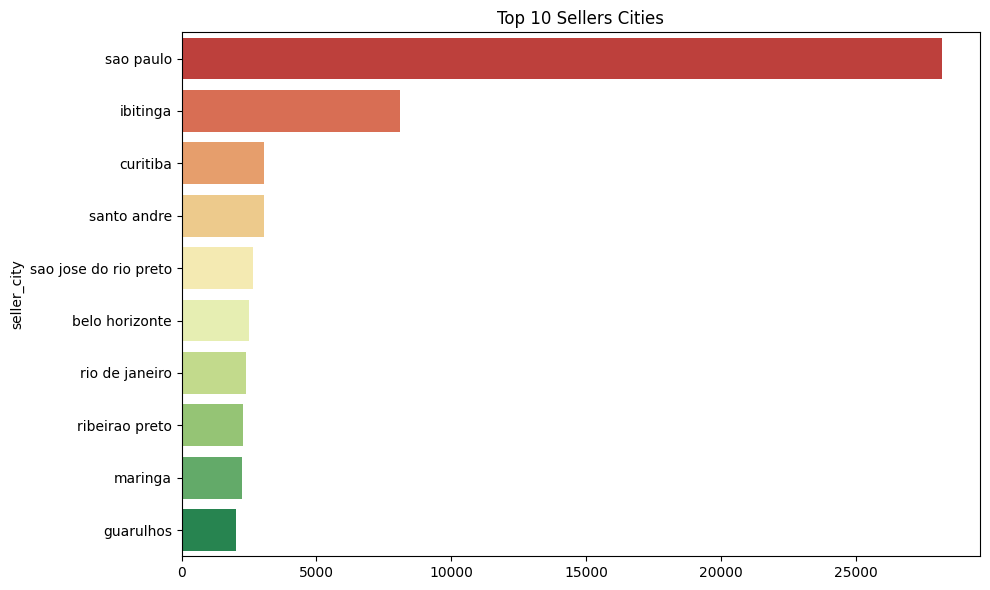

In [81]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.seller_city.value_counts().values[:10], y= df.seller_city.value_counts().index[:10], palette= 'RdYlGn')
plt.title('Top 10 Sellers Cities')

plt.tight_layout()
plt.show()

In [82]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_city,seller_state,product_category_name_english,product_volume,product_category,actual_delivery_duration_days,estimated_delivery_duration_days,delivery_time_diff,delivery_status,z_score_delivery_time_diff
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,itaquaquecetuba,SP,office_furniture,107136.0,Home & Living,8,19,-11,faster,0.049053
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,...,itajai,SC,housewares,53400.0,Home & Living,16,24,-8,faster,0.346055
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,...,itaquaquecetuba,SP,office_furniture,45968.0,Home & Living,26,24,2,late,1.336060
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,...,itaquaquecetuba,SP,office_furniture,79968.0,Home & Living,14,27,-13,faster,-0.148948
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,...,ibitinga,SP,home_confort,23625.0,Home & Living,11,16,-5,faster,0.643056


### Customer Segmentation

#### RFM Analysis

In [83]:
max_transaction_date = df['order_purchase_timestamp'].max()

rfm_table = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_transaction_date - x.max()).days,
    'order_id': lambda x: len(x),
    'payment_value': lambda x: sum(x)
}).rename(columns={
    'order_purchase_timestamp': 'recency',
    'order_id': 'frequency',
    'payment_value': 'monetary'
})

rfm_table

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
ffff371b4d645b6ecea244b27531430a,567,1,112.46


In [84]:
max(rfm_table['frequency'])

75

In [85]:
rfm_table['R_rank'] = rfm_table['recency'].rank(ascending=False)
rfm_table['F_rank'] = rfm_table['frequency'].rank(ascending=True)
rfm_table['M_rank'] = rfm_table['monetary'].rank(ascending=True)
 
rfm_table['R_rank_norm'] = (rfm_table['R_rank']/rfm_table['R_rank'].max())*100
rfm_table['F_rank_norm'] = (rfm_table['F_rank']/rfm_table['F_rank'].max())*100
rfm_table['M_rank_norm'] = (rfm_table['F_rank']/rfm_table['M_rank'].max())*100
 
rfm_table.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_table.head()

,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,75.597314,42.49221,42.49221
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,74.535544,42.49221,42.49221
0000f46a3911fa3c0805444483337064,536,1,86.22,3.455402,42.49221,42.49221
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,28.513084,42.49221,42.49221
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,33.554034,42.49221,42.49221


Formula used for calculating rfm score is : 0.2*Recency score + 0.3*Frequency score + 0.5*Monetary score

In [86]:
rfm_table['RFM_Score'] = 0.2 * rfm_table['R_rank_norm'] + 0.3 * rfm_table['F_rank_norm'] + 0.5 * rfm_table['M_rank_norm']
rfm_table['RFM_Score'] *= 0.05 # normalize to scale [1, 5]

rfm_table = rfm_table.round(2)
rfm_table[['RFM_Score']].head(5)

,RFM_Score
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2.46
0000b849f77a49e4a4ce2b2a4ca5be3f,2.45
0000f46a3911fa3c0805444483337064,1.73
0000f6ccb0745a6a4b88665a16c9f078,1.98
0004aac84e0df4da2b147fca70cf8255,2.04


In [87]:
def segment_customer(score):
    if score >= 4.5:
        return "Top Customers"
    elif score >= 4:
        return "High Value Customer"
    elif score >= 3:
        return "Medium Value Customer"
    elif score >= 1.6:
        return "Low Value Customers"
    else:
        return "Lost Customers"

rfm_table['customer_segment'] = rfm_table['RFM_Score'].apply(segment_customer)
rfm_table.head(10)

,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,customer_segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,75.60,42.49,42.49,2.46,Low Value Customers
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,74.54,42.49,42.49,2.45,Low Value Customers
0000f46a3911fa3c0805444483337064,536,1,86.22,3.46,42.49,42.49,1.73,Low Value Customers
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,28.51,42.49,42.49,1.98,Low Value Customers
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,33.55,42.49,42.49,2.04,Low Value Customers
0004bd2a26a76fe21f786e4fbd80607f,145,1,166.98,67.05,42.49,42.49,2.37,Low Value Customers
00050ab1314c0e55a6ca13cf7181fecf,131,1,35.38,70.35,42.49,42.49,2.40,Low Value Customers
00053a61a98854899e70ed204dd4bafe,182,2,838.36,58.17,90.46,90.46,4.20,High Value Customer
0005e1862207bf6ccc02e4228effd9a0,542,1,150.12,2.96,42.49,42.49,1.73,Low Value Customers


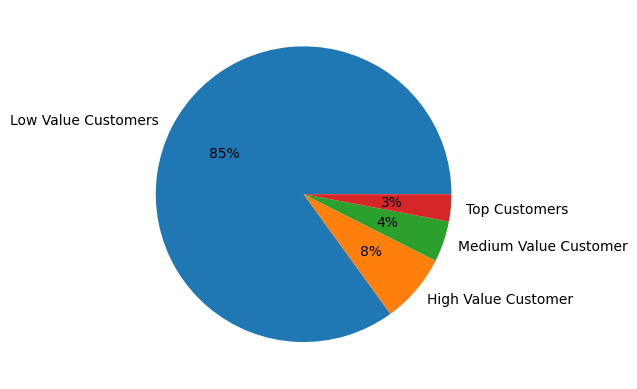

In [88]:
plt.pie(rfm_table['customer_segment'].value_counts(),
        labels=rfm_table.customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

#### K-Means Clustering

In [89]:
rfm_table

,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,customer_segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,75.60,42.49,42.49,2.46,Low Value Customers
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,74.54,42.49,42.49,2.45,Low Value Customers
0000f46a3911fa3c0805444483337064,536,1,86.22,3.46,42.49,42.49,1.73,Low Value Customers
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,28.51,42.49,42.49,1.98,Low Value Customers
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,33.55,42.49,42.49,2.04,Low Value Customers
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,12.07,90.46,90.46,3.74,Medium Value Customer
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,41.28,42.49,42.49,2.11,Low Value Customers
ffff371b4d645b6ecea244b27531430a,567,1,112.46,1.50,42.49,42.49,1.71,Low Value Customers


In [90]:
df_kmeans = rfm_table.copy()
df_kmeans.drop(columns=['recency', 'frequency', 'monetary', 'RFM_Score', 'customer_segment'], inplace=True)

In [97]:
# umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='euclidean')
# umap_result = umap_model.fit_transform(df_kmeans)

In [98]:
# umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
# umap_df

In [103]:
# n_clusters sesuai banyak cluster rfm_analysis, ingin mengetahui perbedaan jumlah dari masing-masing klaster
kmeans = KMeans(n_clusters=5, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(df_kmeans)
df_kmeans['cluster'].value_counts()

cluster
1    26018
0    25929
3    25783
4     6887
2     6848
Name: count, dtype: int64

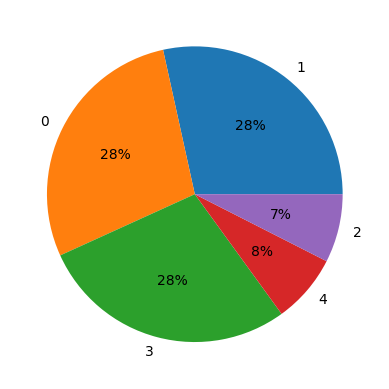

In [104]:
plt.pie(df_kmeans['cluster'].value_counts(),
        labels=df_kmeans['cluster'].value_counts().index,
        autopct='%.0f%%')
plt.show()

In [105]:
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)